<a href="https://colab.research.google.com/github/puckybreg/625.721-Poisson-Mixtures-Final-Project/blob/main/Probability_and_Stochastic_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import math
from nltk.corpus import brown
import numpy as np
from scipy.special import factorial
from scipy.stats import poisson, nbinom, chisquare
from scipy.interpolate import make_interp_spline
from operator import attrgetter

# MLE imports
# import seaborn as sns
# from scipy.optimize import minimize
# import scipy.stats as stats
# import pymc3 as pm3
# import statsmodels.api as sm
# from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline
nltk.download('brown')
brown.words()[:10]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [ ]:
target_word = "East"
target_word_counts_per_doc = []
for doc in brown.fileids(): 
  # print(doc)
  words_in_doc = brown.words(doc)
  count_of_target_word = len([word for word in words_in_doc if word == target_word])
  # print(count_of_target_word)
  target_word_counts_per_doc.append(count_of_target_word)
print(target_word_counts_per_doc)


[0, 0, 1, 0, 4, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 10, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 18, 0, 1, 3, 9, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0

[438.  36.  12.   6.   3.   1.   0.   0.   0.   2.   1.   0.   0.   0.
   0.   0.   0.]
62


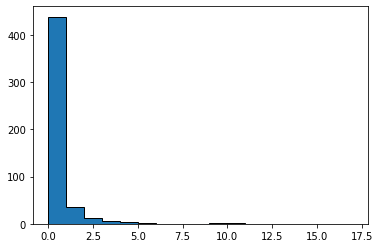

In [ ]:
# Maximum Likelyhood Estimation for Poisson distribution
# It turn out we are just looking for the sample mean
# Nah, this did not work out. 
max_word_count = max(target_word_counts_per_doc)

bins = np.arange(0, max_word_count, 1)
word_counts = plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0, max_word_count),  bins=bins)
np.mean(word_counts[0])

print(word_counts[0])

# How many document contain the word
print(len(list(filter( lambda x: x !=0, target_word_counts_per_doc))))

[1.35470686e-01 2.70805902e-01 2.70670499e-01 1.80356776e-01
 9.01332987e-02 3.60352928e-02 1.20057584e-02 3.42850157e-03
 8.56696831e-04 1.90281885e-04]


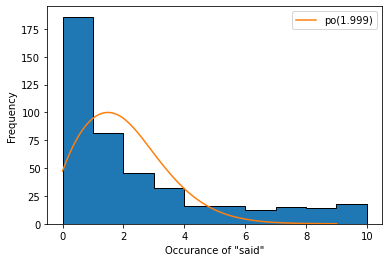

In [ ]:
# Poisson Distribution

plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10])

# Plot histogram for East
# plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0,6), bins=[0,1,2,3,4,5,6])

plt.xlabel(f'Occurance of \"{target_word}\"')
plt.ylabel('Frequency')

# creating a numpy array for x-axis
x = np.arange(0, 10, 1)

# poisson distribution data for y-axis
mu=1.999
y = poisson.pmf(x, mu)
print(y)
X_Y_Spline = make_interp_spline(x, y*350)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Poisson_Y_ = X_Y_Spline(X_)
 
# # Plotting the Graph
plt.plot(X_, Poisson_Y_, label=f'po({mu})')

plt.legend()



plt.show()

192426.17877895376
58.287706176107655
{'lambda': 0.28799999999999976, 'stat_value': 58.287706176107655, 'chi-square': Power_divergenceResult(statistic=58.287706176107655, pvalue=1.3645263643305888e-12)}
[393.  85.  15.   5.]
[ 50.93697801 101.82301905 101.77210754  67.81414766]


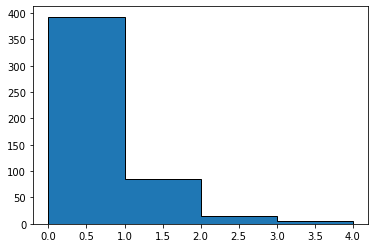

In [ ]:
# Take a Chi-squared gooness of fit test on the Poisson modelling data
max_word_count = max(target_word_counts_per_doc)
max_bucket_count = 6
bins = np.arange(0, max_word_count, 1)
word_counts = plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0, max_word_count),  bins=bins)[0]
x = np.arange(0, len(word_counts), 1)

potential_lambda = np.arange(0.01,2,.001)
chi_square_values = []
for lam in potential_lambda:
  y = poisson.pmf(x, lam)
  scaled_poisson = y*376
  chi_square = chisquare(f_obs=word_counts[:max_bucket_count], f_exp=scaled_poisson[:max_bucket_count])
  chi_square_values.append({"lambda": lam, "stat_value": chi_square[0], "chi-square": chi_square})

print(chi_square_values[3]['stat_value'])
min_num = min([val['stat_value'] for val in chi_square_values])
print(min_num)

for chi_square in chi_square_values:
  if chi_square['stat_value'] == min_num:
    print(chi_square)
    break
print(word_counts[:max_bucket_count])
print(scaled_poisson[:max_bucket_count])

[0 1 2 3 4 5 6 7 8 9]
[0.40739791 0.16768498 0.10493726 0.07316226 0.05362062 0.0404471
 0.03108764 0.02421106 0.01904079 0.01508792]


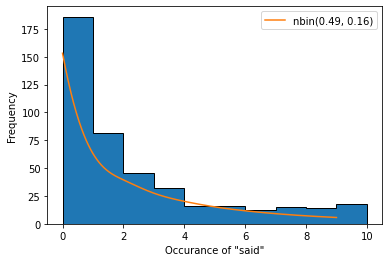

In [ ]:
# Negative Binomial Distribtuion 

plt.hist(
    target_word_counts_per_doc, edgecolor='black', 
    histtype='stepfilled', range=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel(f'Occurance of \"{target_word}\"')
plt.ylabel('Frequency')

# creating a numpy array for x-axis
x = np.arange(0, 10, 1)
nbin_n = .49
nbin_p = 0.16

# poisson distribution data for y-axis
y = nbinom.pmf(x, nbin_n, nbin_p)
X_Y_Spline = make_interp_spline(x, y*376)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Negative_Binomial_Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Negative_Binomial_Y_, label=f'nbin({nbin_n}, {nbin_p})')
plt.legend()
plt.show()


1886.1995917459267
25.527334860607446
{'n': 1.01, 'p': 0.79, 'stat_value': 25.527334860607446, 'chi-square': Power_divergenceResult(statistic=25.527334860607446, pvalue=1.1977399420339897e-05)}


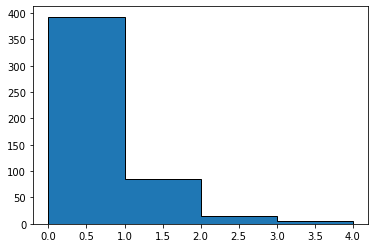

In [ ]:
# Take a Chi-squared gooness of fit test on the Negative Binomial modelling data
max_word_count = max(target_word_counts_per_doc)

bins = np.arange(0, max_word_count, 1)
word_counts = plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0, max_word_count),  bins=bins)[0]
x = np.arange(0, len(word_counts), 1)

potential_n = np.arange(0.01,1.5,.01)
potential_p = np.arange(0.01,1,.01)
chi_square_values = []
# print(potential_lambda)
for n in potential_n:
  for p in potential_p:
    y = nbinom.pmf(x, n, p)
    scaled_poisson = y*400
    chi_square = chisquare(f_obs=word_counts[:max_bucket_count], f_exp=scaled_poisson[:max_bucket_count])
    # print(chi_square)
    chi_square_values.append({"n": n, "p": p, "stat_value": chi_square[0], "chi-square": chi_square})


print(chi_square_values[3]['stat_value'])
min_num = min([val['stat_value'] for val in chi_square_values])
print(min_num)

for chi_square in chi_square_values:
  if chi_square['stat_value'] == min_num:
    print(chi_square)
    break

# print(word_counts[:max_bucket_count])
# print(scaled_poisson[:max_bucket_count])

# # Analysis being done on the first 7 values
# print(chisquare(f_obs=word_counts[:10], f_exp=scaled_poisson[:10]))




In [ ]:
max_word_count

18

[0 1 2 3 4 5 6 7 8 9]
y_not_zero [0.16632    0.1047816  0.07334712 0.05391013 0.04075606 0.03138217
 0.02447809 0.0192765  0.01529269]


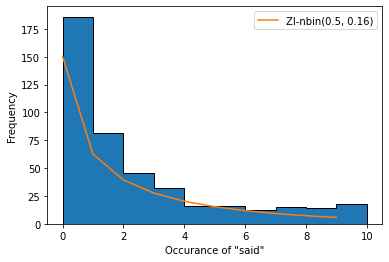

In [ ]:
# Zero Inflation Poisson Mixture

plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10])

# Plot histogram for East
# plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0,6), bins=[0,1,2,3,4,5,6])

plt.xlabel(f'Occurance of \"{target_word}\"')
plt.ylabel('Frequency')

# Negative Binomial Distribtuion 

# creating a numpy array for x-axis
x = np.arange(0, max_bucket_count, 1)
n =  .5
p = .16

print(x)
# poisson distribution data for y-axis
z = 0.01
y_equal_to_zero = nbinom.pmf(x[0], n, p)

y_not_zero = nbinom.pmf(x[1:], n, p)*(1-z)
print("y_not_zero", y_not_zero)

Zinf_y = np.insert(y_not_zero, 0, y_equal_to_zero)

# print("y", y*376)
# X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
# X_ = np.linspace(x.min(), x.max(), 500)
# Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
# plt.plot(X_, Y_, label=f'ZI-nbin(n, p)')
plt.plot(x,Zinf_y*376, label=f'ZI-nbin({n}, {p})')
plt.legend()
plt.show()

413.4957894423402
39.40460334023143
{'n': 0.14, 'p': 0.4, 'z': 0.01, 'stat_value': 39.40460334023143, 'chi-square': Power_divergenceResult(statistic=39.40460334023143, pvalue=1.968634161574145e-07)}


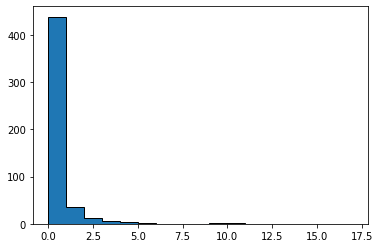

In [ ]:
# Take a Chi-squared gooness of fit test on the Zero Inflated Neg Binomial modelling data
max_word_count = max(target_word_counts_per_doc)
max_bucket_count = 6
bins = np.arange(0, max_word_count, 1)
word_counts = plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0, max_word_count),  bins=bins)[0]
x = np.arange(0, len(word_counts), 1)
# n = 0.49
# p = 0.16
z = 0.01
# y = nbinom.pmf(x, n, p)
# scaled_poisson = y*376


potential_n = np.arange(0.01,2,.01)
potential_p = np.arange(0.01,1,.01)
# potential_z = np.arange(0.01,.5,.01)
chi_square_values = []
# print(potential_lambda)
for n in potential_n:
  for p in potential_p:
    # for z in potential_z:
    y_equal_to_zero = z+(1-z)*nbinom.pmf(x[0], n, p)
    y_not_zero = nbinom.pmf(x[1:], n, p)*(1-z)
    y = np.insert(y_not_zero, 0, y_equal_to_zero)

    scaled_poisson = y*376
    chi_square = chisquare(f_obs=word_counts[:max_bucket_count], f_exp=scaled_poisson[:max_bucket_count])
    # print(chi_square)
    chi_square_values.append({"n": n, "p": p, "z":z, "stat_value": chi_square[0], "chi-square": chi_square})


print(chi_square_values[3]['stat_value'])
min_num = min([val['stat_value'] for val in chi_square_values])
print(min_num)

for chi_square in chi_square_values:
  if chi_square['stat_value'] == min_num:
    print(chi_square)
    break

# print(word_counts[:10])
# print(scaled_poisson[:10])

# # Analysis being done on the first 7 values
# print(chisquare(f_obs=word_counts[:10], f_exp=scaled_poisson[0:10]))


In [ ]:
# chi_square_values
z + (1-z)

1.0

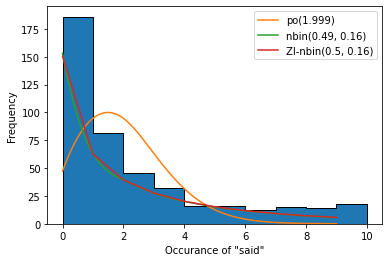

In [ ]:
plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0,10), bins=[0,1,2,3,4,5,6,7,8,9,10])

# Plot histogram for East
# plt.hist(target_word_counts_per_doc, edgecolor='black', histtype='stepfilled', range=(0,6), bins=[0,1,2,3,4,5,6])

plt.xlabel(f'Occurance of \"{target_word}\"')
plt.ylabel('Frequency')

# Plotting Poission
plt.plot(X_, Poisson_Y_, label=f'po({mu})')


# Plotting Negative Binomial
plt.plot(X_, Negative_Binomial_Y_, label=f'nbin({nbin_n}, {nbin_p})')

# Plotting Zinf
plt.plot(x,Zinf_y*376, label=f'ZI-nbin({n}, {p})')

plt.legend()

plt.show()